# Analysis of Gaussian Mixture Models 

This notebook shows examples and usage of the biokit.stats.module. 

The **mixture** module provides tools to create mixture models (gaussian), denoted GMM hereafter. Conversely class are provided to estimate the parameters of the GMM using either minimization or Expectation Minimization. 

We also provide examples to show how to automatically estimate the number of GMMs and limitations of such methods. 

In [46]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (12,6)
matplotlib.rcParams['figure.dpi'] = 120
from biokit.stats import mixture
reload(mixture)
import seaborn

Populating the interactive namespace from numpy and matplotlib


### gaussian mixture model

In [47]:
m = mixture.GaussianMixture(mu=[-2, 1], sigma=[0.5,0.5], 
                    mixture=[.2,.8], N=50)

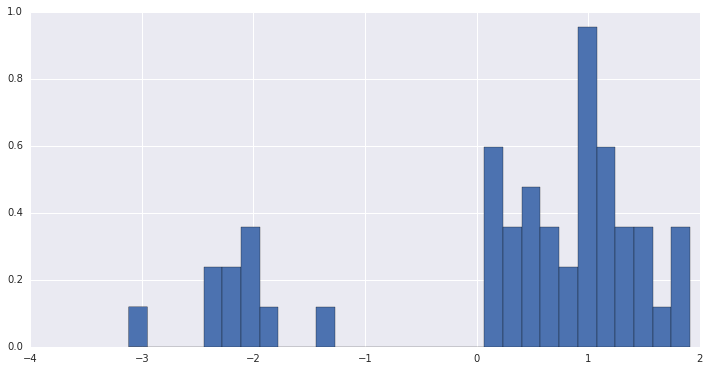

In [48]:
# data is stored in m.data and an histogram can easily be shown:
m.hist()

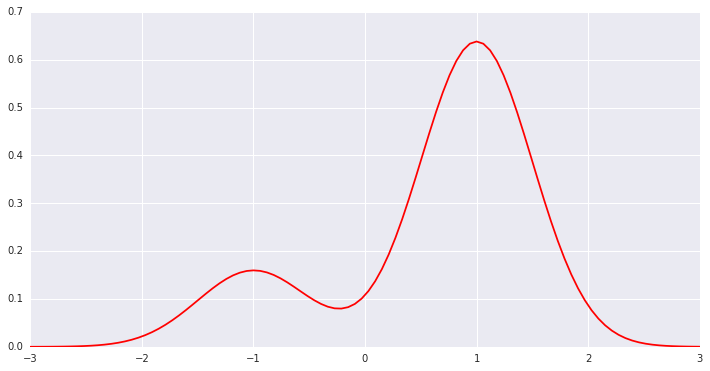

In [49]:
# In order to figure out the underlying parameters of the distribution
# given the above sample, we will first use the GaussianMixtureFitting 
# class, which minimizes the  distribution of the data to a mixture 
# of gaussian model, which is provided inside the GaussianMixtureModel 
# class:
gmm = mixture.GaussianMixtureModel(k=2)

X = linspace(-3,3,100)
plot(X, gmm.pdf(X, params=[-1,0.5,0.2,1,0.5,0.8]), 'r')



### Gaussian Mixture model Fitting (minimization)

In [50]:
# now, let us use the following class to figure out the parameters of the
# gaussian models. We have to provide the number of models. Here k=2
mf = mixture.GaussianMixtureFitting(m.data, k=2)

In [51]:
#
mf.estimate()

            AIC: 127.10828422036774
           AICc: 127.3636033693039
            BIC: 6.148291878037601
  final_simplex: (array([[ -2.16579333e+00,   3.95528703e-01,   3.16575215e-07,
          7.76901361e-01,   5.27924368e-01,   1.26975599e-06],
       [ -2.16578341e+00,   3.95552073e-01,   4.26637408e-07,
          7.76895361e-01,   5.27928290e-01,   1.71134547e-06],
       [ -2.16577530e+00,   3.95570270e-01,   5.10442178e-07,
          7.76890607e-01,   5.27931585e-01,   2.04818535e-06],
       [ -2.16576460e+00,   3.95590486e-01,   5.42559419e-07,
          7.76885350e-01,   5.27935712e-01,   2.17417576e-06],
       [ -2.16583875e+00,   3.95448291e-01,   4.62113985e-07,
          7.76921956e-01,   5.27907179e-01,   1.85116756e-06],
       [ -2.16576759e+00,   3.95586808e-01,   5.68016237e-07,
          7.76886335e-01,   5.27934609e-01,   2.27599096e-06],
       [ -2.16576517e+00,   3.95591482e-01,   6.59965889e-07,
          7.76884923e-01,   5.27935669e-01,   2.64761341e-06]]),

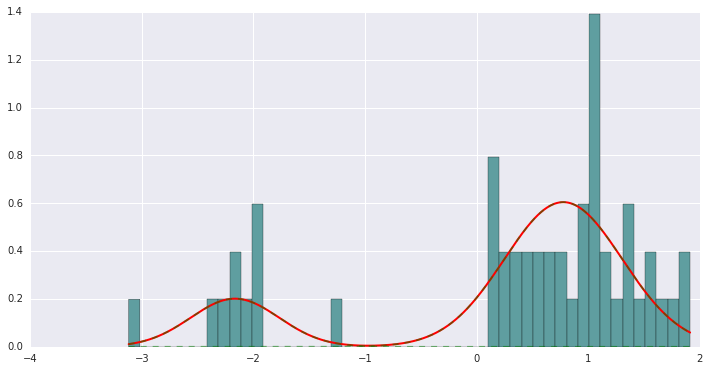

In [52]:
mf.plot()

### Expectation Minimization

Another method to estimate the parameters is to use an Expectation
Minimization algorithm

In [53]:
em = mixture.EM(m.data, model=gmm)

In [54]:
em.estimate()

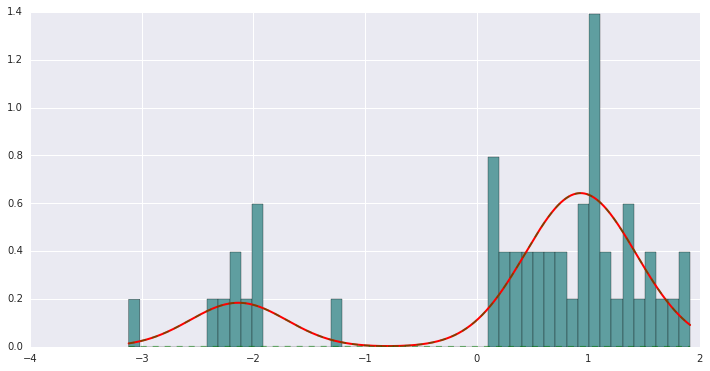

In [55]:
em.plot()

In [56]:
em.results.mus

[-2.1347714302223011, 0.93124661276903264]

In [57]:
# to compare to numerical values found with the GaussianMixtureFitting 
mf.results.mus

[-2.1657933264839655, 0.77690136073659666]

### How EM and minimization compare in terms of parameter estimation

Is the EM better than MixtureFitting class (scipy minimisation) ?

We can check that by generating N simulated data sets for some parameters

In [58]:
res_mf = []; res_em = []
N = 50
from easydev import Progress
replicates = 100
p = Progress(replicates)

mus = [-2,1]
sigmas = [0.5,0.5]
pis= [.2,0.8]
for i in range(0, replicates):
    m = mixture.GaussianMixture(mu=mus, sigma=sigmas, mixture=pis, N=N)
    mf = mixture.GaussianMixtureFitting(m.data)
    mf.estimate(guess=[-.8,0.5,0.5,.8,0.5,0.5])
    res_mf.append(mf.results)
    
    em = mixture.EM(m.data, model=gmm)
    em.estimate(guess=[-.8, 0.5, 0.5, .8, 0.5, 0.5])
    res_em.append(em.results)
    p.animate(i+1)
    
    

 [-----------------100%-----------------] 100 of 100 complete in 4.9 sec

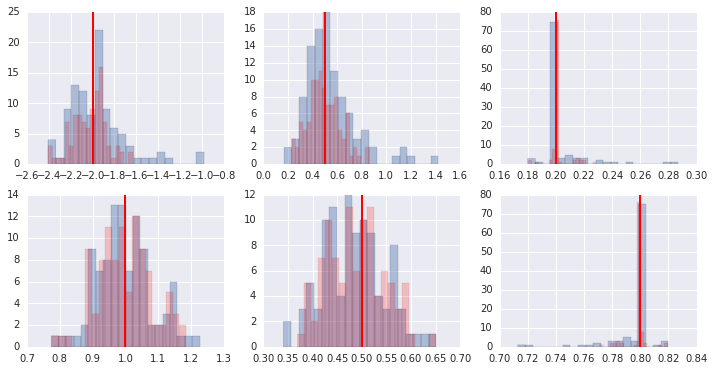

In [59]:
subplot(2,3,1)
hist([x.mus[0] for x in res_mf], 20, alpha=0.4);
hist([x.mus[0] for x in res_em], 20, color='r', alpha=0.2)
axvline(mus[0], color='r', lw=2)

subplot(2,3,2)
hist([x.sigmas[0] for x in res_mf], 20, alpha=0.4);
hist([x.sigmas[0] for x in res_em], 20, color='r', alpha=0.2)
axvline(sigmas[0], color='r', lw=2)

subplot(2,3,3)
hist([x.pis[0] for x in res_mf], 20, alpha=0.4);
hist([x.pis[0] for x in res_em], 20, color='r', alpha=0.2)
axvline(pis[0], color='r', lw=2)

subplot(2,3,4)
hist([x.mus[1] for x in res_mf], 20, alpha=0.4);
hist([x.mus[1] for x in res_em], 20, color='r', alpha=0.2)
axvline(mus[1], color='r', lw=2)

subplot(2,3,5)
hist([x.sigmas[1] for x in res_mf], 20, alpha=0.4);
hist([x.sigmas[1] for x in res_em], 20, color='r', alpha=0.2)
axvline(sigmas[1], color='r', lw=2)

subplot(2,3,6)
hist([x.pis[1] for x in res_mf], 20, alpha=0.4);
hist([x.pis[1] for x in res_em], 20, color='r', alpha=0.2)
axvline(pis[1], color='r', lw=2)


Performace are quite similar

### Adaptive Estimation of required number of models

In [60]:
reload(mixture)
m = mixture.GaussianMixture(mu=[-1, 1], sigma=[0.5,0.5], 
                    mixture=[.2,.8], N=50)

In [61]:
# if we know that k=2, it is easy to estimate the parameters
res = mf.estimate(k=2)

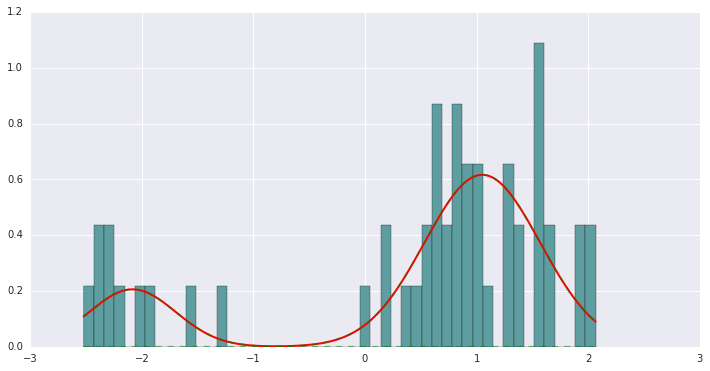

In [62]:
mf.plot()

### What about automatic inference of k ?

('Found min ', 114.39158576082772, 'for k  ', 3)


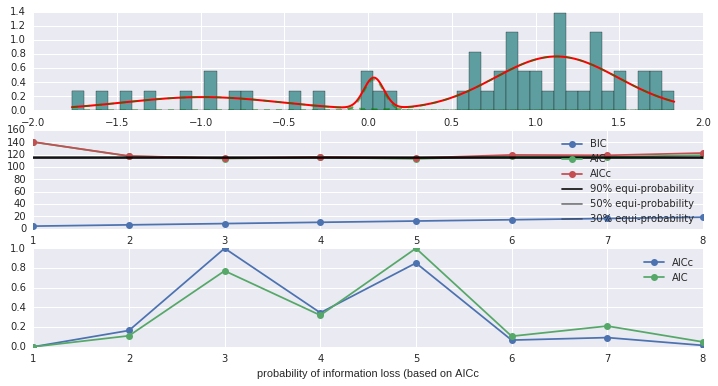

In [63]:
amf = mixture.AdaptativeMixtureFitting(m.data)
amf.diagnostic(kmin=1, kmax=8)

The proposed/optimal k in terms of Aikike is k=4, which is 
not correct.

What about using EM ?

In [64]:
amf.fitting = mixture.EM(m.data)

In [65]:
amf.run(kmin=1, kmax=6)

('Found min ', 113.04120262352387, 'for k  ', 4)


issue arised at iteration 37
('Found min ', 100.58191235908912, 'for k  ', 8)


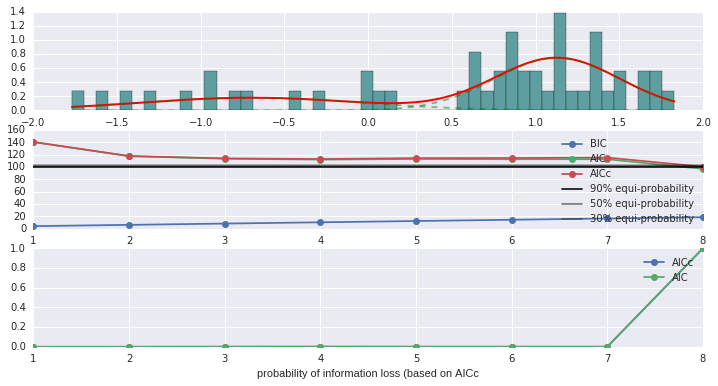

In [66]:
amf.diagnostic(k=2)

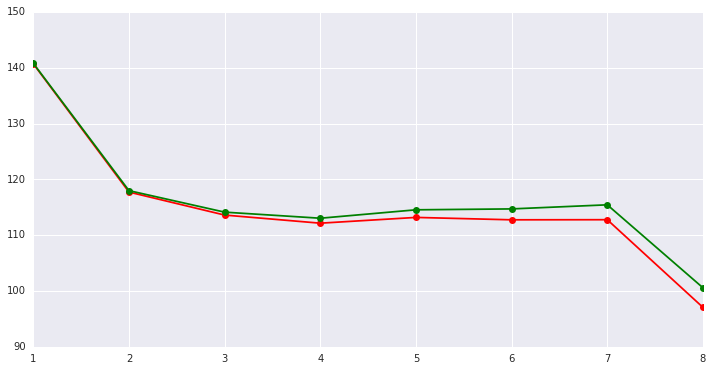

In [67]:
plot(amf.x[0:8], [amf.all_results[i]['AIC'] for i in amf.x[0:8]], 'or-')
plot(amf.x[0:8], [amf.all_results[i]['AICc'] for i in amf.x[0:8]], 'og-')

Now the question is how reliable is this estimation of k on 100 experiments ?

In [71]:
reload(mixture)

bestk_em = []
aics_em = []

bestk_m = []
aics_m = []

replicates = 100
p = Progress(replicates)

for i in range(0, replicates):
    m = mixture.GaussianMixture(mu=[-1, 1], sigma=[0.5,0.5], 
                    mixture=[.2,.8], N=1000)
    amf = mixture.AdaptativeMixtureFitting(m.data)
    amf.verbose = False
    amf.fitting = mixture.EM(m.data)
    amf.run()
    bestk_em.append(amf.best_k)
    aics_em.append(amf.fitting.results.AIC)
    
    amf = mixture.AdaptativeMixtureFitting(m.data)
    amf.verbose = False
    amf.run()
    bestk_m.append(amf.best_k)
    aics_m.append(amf.fitting.results.AIC)
    
    p.animate(i+1)

 [-----------------100%-----------------] 100 of 100 complete in 195.0 sec

In [ ]:
res = hist([bestk_em, bestk_m])
legend(['EM', 'minimization'])

([array([  8.,  10.,  13.,  18.,  17.,  14.,  13.,   1.,   4.,   2.]),
  array([  6.,  11.,  10.,  18.,  19.,  14.,  14.,   2.,   3.,   3.])],
 array([ 2280.76530454,  2298.66293192,  2316.56055929,  2334.45818667,
         2352.35581405,  2370.25344143,  2388.1510688 ,  2406.04869618,
         2423.94632356,  2441.84395094,  2459.74157831]),
 <a list of 2 Lists of Patches objects>)

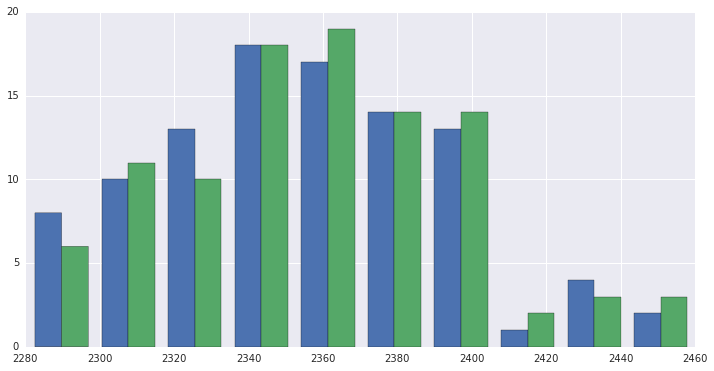

In [158]:
hist([aics_em, aics_m])


### Conclusions

When N = 50, the adaptative EM or Minimization methods do not allow the 
recovery of k automaticaly. you need ~ 1000 points

There is no obvious differences between the two algorithms.